# Guided Project: Visualizing Earnings Based On College Majors

This project dataset is on the job outcomes of students who graduated from college between 2010 to 2012. The original data was released by ["American community survey"](https://www.census.gov/programs-surveys/acs/). FiveThirtyEight cleaned the dataset and released it on their ['Github repo'](https://github.com/fivethirtyeight/data/tree/master/college-majors) and will be using that dataset for this project.


Some of the columns of the data set is as below

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

Using data visualization the aim is to explore:
* Does students in more polpular majors make more money?
* How many majors are predominately male or female?
* which catergory of majors have most students?

In [41]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [42]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads_head = recent_grads.iloc[0]
print(recent_grads_head)

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [43]:
recent_grads.describe()

Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   42869.655092   14648.179473   
min      0.000000     2.000000       0.000000     111.000000       0.000000   
25%      0.336026    39.000000    3608.000000    3154.000000    1030.000000   
50%      0.534024   130.000000   11797.000000   10048.000000    3299.000000   
75%      0.703299   338.000000   31433.000000   25147.000000    9948.000000   
max      0.968954  4212.000000  307933.000000  251540.000000  115172.000000   

       Full_time_year_round    Unemployed  Unemployment_rate         Median  \
count            173.000000    173.000000         173.000000     173.000000   
mean           19694.427746   2416.329480           0.068191   40151.445087   
std            33160.941514   4112.803148           0.030331   11470.181802   
min              111.000000      0.000000           0.000000   22000.000000   
25%             2453.000000    304.000000           0.050306   33000.000000   
50%             7413.000000    893.000000           0.067961   36000.000000   
75%            16891.000000   2393.000000           0.087557   45000.000000   
max           199897.000000  28169.000000           0.177226  110000.000000   

              P25th          P75th   College_jobs  Non_college_jobs  \
count    173.000000     173.000000     173.000000        173.000000   
mean   29501.445087   51494.219653   12322.635838      13284.497110   
std     9166.005235   14906.279740   21299.868863      23789.655363   
min    18500.000000   22000.000000       0.000000          0.000000   
25%    24000.000000   42000.000000    1675.000000       1591.000000   
50%    27000.000000   47000.000000    4390.000000       4595.000000   
75%    33000.000000   60000.000000   14444.000000      11783.000000   
max    95000.000000  125000.000000  151643.000000     148395.000000   

       Low_wage_jobs  
count     173.000000  
mean     3859.017341  
std      6944.998579  
min         0.000000  
25%       340.000000  
50%      1231.000000  
75%      3466.000000  
max     48207.000000

In [44]:
recent_grads.head(4)

Rank  Major_code                                      Major   Total  \
0     1        2419                      PETROLEUM ENGINEERING  2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING   756.0   
2     3        2415                  METALLURGICAL ENGINEERING   856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING  1258.0   

      Men  Women Major_category  ShareWomen  Sample_size  Employed  \
0  2057.0  282.0    Engineering    0.120564           36      1976   
1   679.0   77.0    Engineering    0.101852            7       640   
2   725.0  131.0    Engineering    0.153037            3       648   
3  1123.0  135.0    Engineering    0.107313           16       758   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  1207          37   
1      ...              170                   388          85   
2      ...              133                   340          16   
3      ...              150                   692          40   

   Unemployment_rate  Median  P25th   P75th  College_jobs  Non_college_jobs  \
0           0.018381  110000  95000  125000          1534               364   
1           0.117241   75000  55000   90000           350               257   
2           0.024096   73000  50000  105000           456               176   
3           0.050125   70000  43000   80000           529               102   

   Low_wage_jobs  
0            193  
1             50  
2              0  
3              0  

[4 rows x 21 columns]

In [45]:
recent_grads.tail(4)

Rank  Major_code                   Major   Total    Men   Women  \
169   170        5201  EDUCATIONAL PSYCHOLOGY  2854.0  522.0  2332.0   
170   171        5202     CLINICAL PSYCHOLOGY  2838.0  568.0  2270.0   
171   172        5203   COUNSELING PSYCHOLOGY  4626.0  931.0  3695.0   
172   173        3501         LIBRARY SCIENCE  1098.0  134.0   964.0   

               Major_category  ShareWomen  Sample_size  Employed  \
169  Psychology & Social Work    0.817099            7      2125   
170  Psychology & Social Work    0.799859           13      2101   
171  Psychology & Social Work    0.798746           21      3777   
172                 Education    0.877960            2       742   

         ...        Part_time  Full_time_year_round  Unemployed  \
169      ...              572                  1211         148   
170      ...              648                  1293         368   
171      ...              965                  2738         214   
172      ...              237                   410          87   

     Unemployment_rate  Median  P25th  P75th  College_jobs  Non_college_jobs  \
169           0.065112   25000  24000  34000          1488               615   
170           0.149048   25000  25000  40000           986               870   
171           0.053621   23400  19200  26000          2403              1245   
172           0.104946   22000  20000  22000           288               338   

     Low_wage_jobs  
169             82  
170            622  
171            308  
172            192  

[4 rows x 21 columns]

In [46]:
#number of rows and columns
recent_grads.shape

(173, 21)

In [47]:
#sum of the missing values
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

There is 173 rows in the data set, however we can see that some of columns contain null values(colums Total, Men, Women and ShareWomen). we will drop those rows using dropna() and clean the data

In [48]:
#length of the dataset with the null values
raw_data_count = len(recent_grads)
print(raw_data_count)

173


In [49]:
#drop the null values and assign to the dataframe
recent_grads = recent_grads.dropna(axis = 0)

In [50]:
#length of the data set without the null values
cleaned_data_count = len(recent_grads)
print(cleaned_data_count)

172


In [51]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

### Generating Scatter Plots

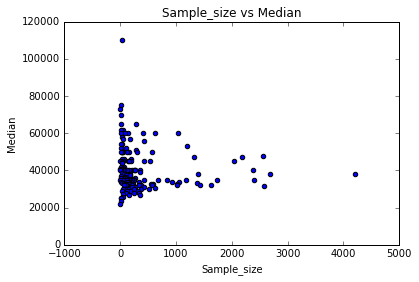

In [52]:
ax1 = recent_grads.plot(x="Sample_size", y="Median",kind="scatter")
ax1.set_title("Sample_size vs Median")


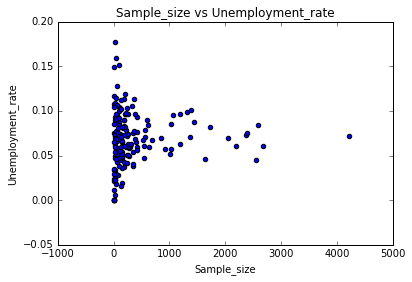

In [53]:
ax2 = recent_grads.plot(x="Sample_size", y="Unemployment_rate",kind="scatter")
ax2.set_title("Sample_size vs Unemployment_rate")

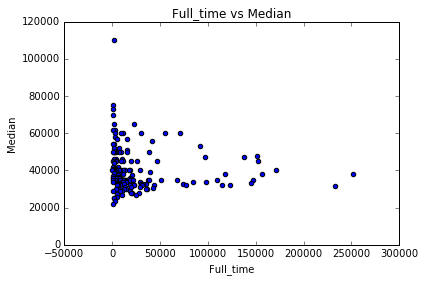

In [54]:
ax3 = recent_grads.plot(x="Full_time", y="Median",kind="scatter")
ax3.set_title("Full_time vs Median")

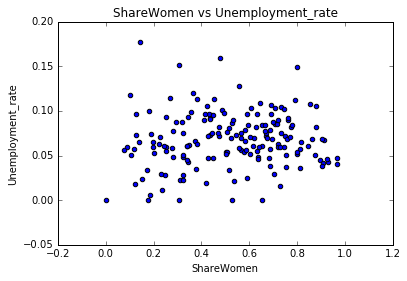

In [55]:
ax4 = recent_grads.plot(x="ShareWomen", y="Unemployment_rate",kind="scatter")
ax4.set_title("ShareWomen vs Unemployment_rate")

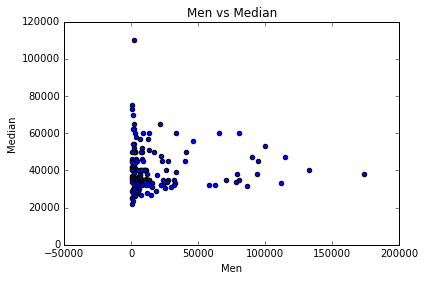

In [56]:
ax5 = recent_grads.plot(x="Men", y="Median",kind="scatter")
ax5.set_title("Men vs Median")

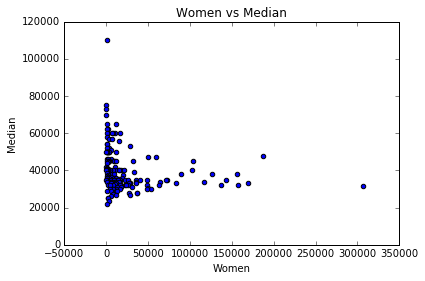

In [57]:
ax6 = recent_grads.plot(x="Women", y="Median",kind="scatter")
ax6.set_title("Women vs Median")

* From the Full_time vs Median graph it is concluded that 65% of the full time employees receive salary range of up to 25,000 dollars
* There is no correlation between Unemployment rate and ShareWomen.
* There seem to be no obvious correlations in the scatter plot but looking at the scatter we can conclude that student men make more money than the female students. We will explore that further later.

### Generating histograms

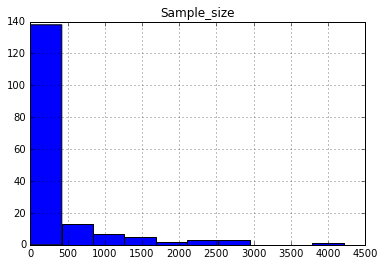

In [58]:
ax12 = recent_grads["Sample_size"].hist()
ax12.set_title("Sample_size")

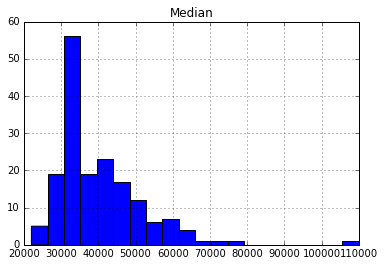

In [59]:
ax13 = recent_grads["Median"].hist(bins=20)
ax13.set_title("Median")

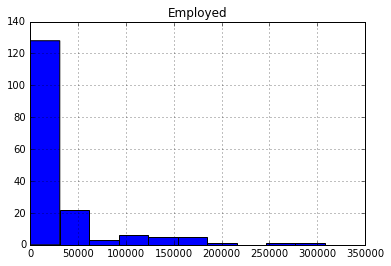

In [60]:
ax14 = recent_grads["Employed"].hist()
ax14.set_title("Employed")

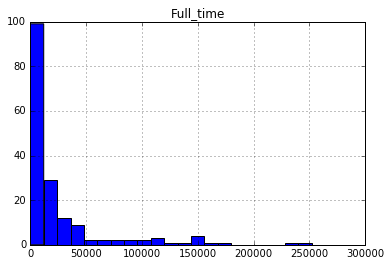

In [61]:
ax15 = recent_grads["Full_time"].hist(bins=25, range=(0,300000))
ax15.set_title("Full_time")

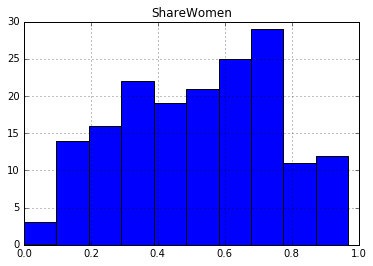

In [62]:
ax16 = recent_grads["ShareWomen"].hist()
ax16.set_title("ShareWomen")

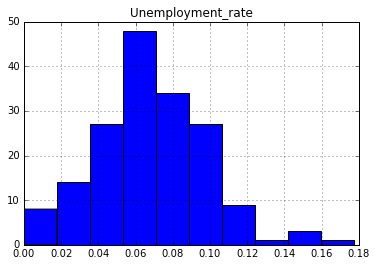

In [63]:
ax17 = recent_grads["Unemployment_rate"].hist()
ax17.set_title("Unemployment_rate")


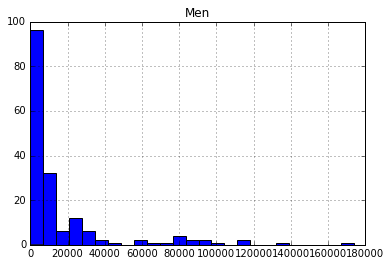

In [64]:
ax18 = recent_grads["Men"].hist(bins = 25)
ax18.set_title("Men")

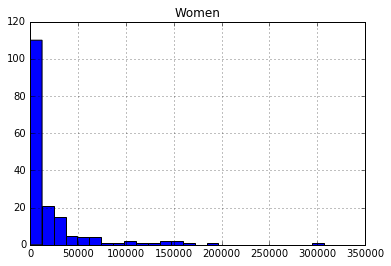

In [65]:
ax19 = recent_grads["Women"].hist(bins=25)
ax19.set_title("Women")

1. More than 50% majors are predominately male and more than 40% majors are predominately from females
2. Most common salay range is aproximately 35,000.00

### Scatter Matrix plots

In [66]:
#import scatter_matrix from pandas.plotting
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd474933ef0>,
      dtype=object)

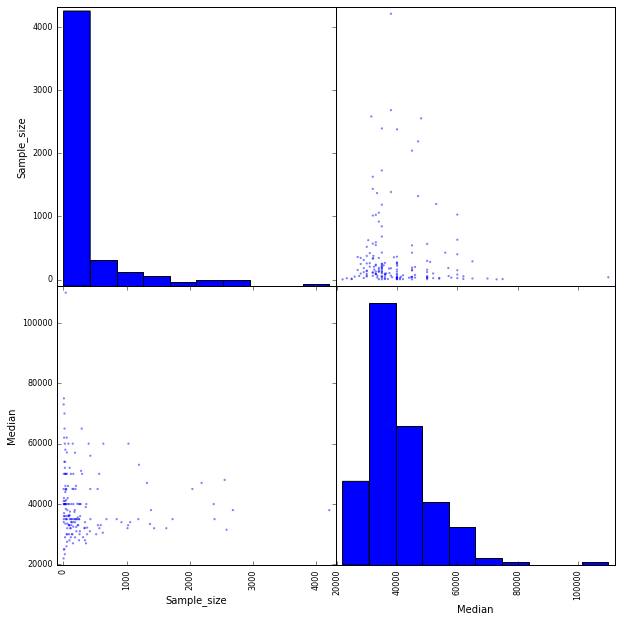

In [67]:
scatter_matrix(recent_grads[["Sample_size","Median"]], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd474778710>,
      dtype=object)

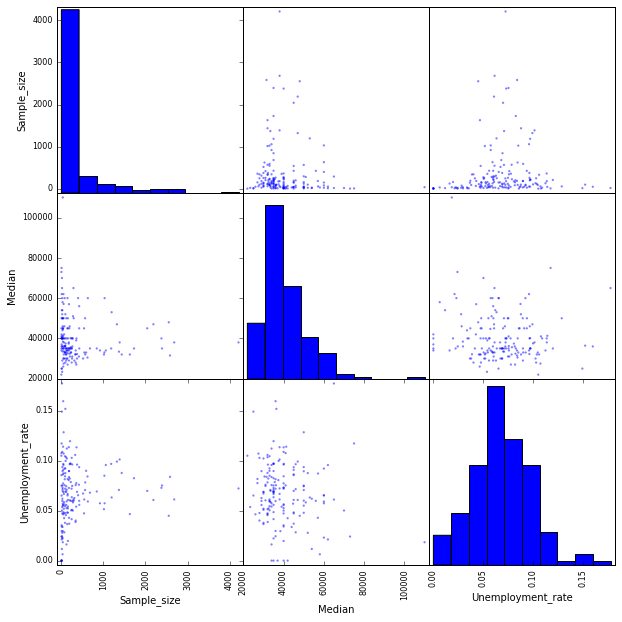

In [68]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]], figsize=(10,10))

### Bar plots

Using the bar plots to compare the percentage of women(ShareWomen) from the first 10 rows and last 10 rows of the recent_grads dataframe.

Then for the first 10 rows and the last 10 rows compare the Unemployment rate with Majors.

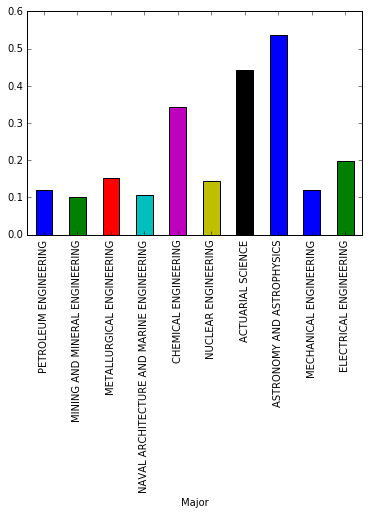

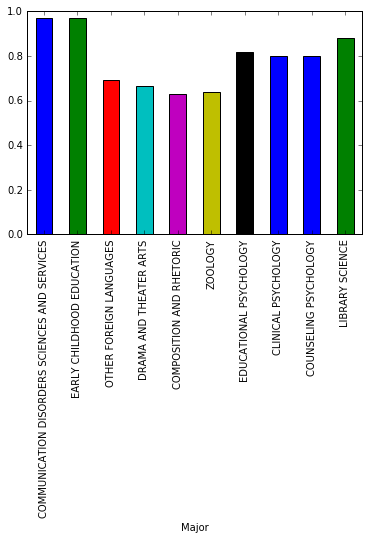

In [69]:
recent_grads.head(10).plot.bar(x = "Major", y="ShareWomen", legend = False)
recent_grads.tail(10).plot.bar(x = "Major", y="ShareWomen", legend = False)

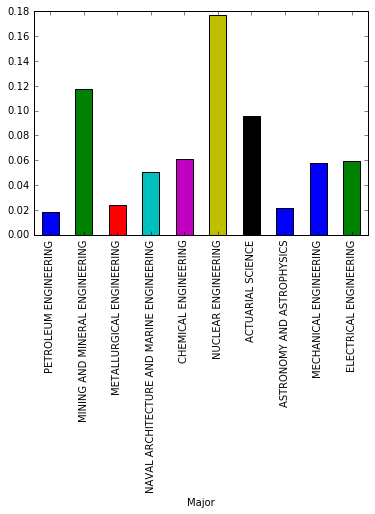

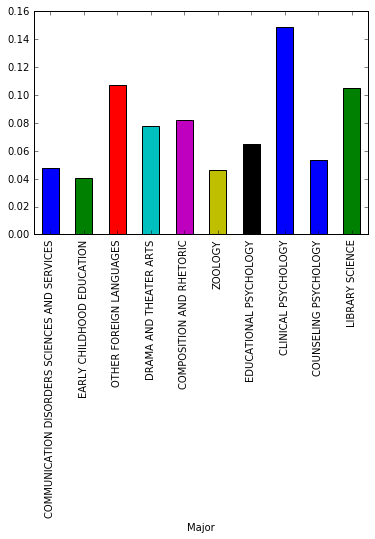

In [70]:
recent_grads[:10].plot.bar(x ="Major", y ="Unemployment_rate", legend = False)
recent_grads.tail(10).plot.bar(x ="Major", y ="Unemployment_rate", legend = False)

### Group bar plot

Use a group bar plot to compare the number of men with the number of women in each category of majors

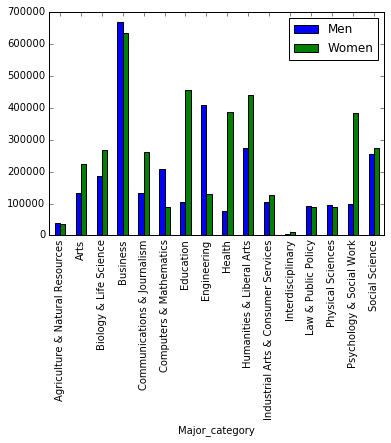

In [71]:
recent_grads.groupby("Major_category")['Men','Women'].sum().plot(kind = "bar")

* From the above results we can see that Enginering and computer and mathematics majors are predominately male and Education, Health, phychology and Social work areas are predominately female. 
* category Bussiness is the major that most number of students are enrolled in.

In [72]:
recent_grads.groupby("Major_category").sum().head(3)

Rank  Major_code     Total       Men  \
Major_category                                                          
Agriculture & Natural Resources   993       10421   75620.0   40357.0   
Arts                             1049       48121  357130.0  134390.0   
Biology & Life Science           1335       48662  453862.0  184919.0   

                                    Women  ShareWomen  Sample_size  Employed  \
Major_category                                                                 
Agriculture & Natural Resources   35263.0    3.647407         1068     63794   
Arts                             222740.0    4.829264         3260    288114   
Biology & Life Science           268943.0    8.220700         2317    302797   

                                 Full_time  Part_time  Full_time_year_round  \
Major_category                                                                
Agriculture & Natural Resources      55585      15470                 41891   
Arts                                207773     114791                153111   
Biology & Life Science              240377     116736                165802   

                                 Unemployed  Unemployment_rate  Median  \
Major_category                                                           
Agriculture & Natural Resources        3486           0.466352  316000   
Arts                                  28228           0.721382  264500   
Biology & Life Science                22854           0.852849  509900   

                                  P25th   P75th  College_jobs  \
Major_category                                                  
Agriculture & Natural Resources  222000  410100         18677   
Arts                             175700  349300         94785   
Biology & Life Science           372600  645200        151233   

                                 Non_college_jobs  Low_wage_jobs  
Major_category                                                    
Agriculture & Natural Resources             33217           7414  
Arts                                       163720          60116  
Biology & Life Science                     127182          42742

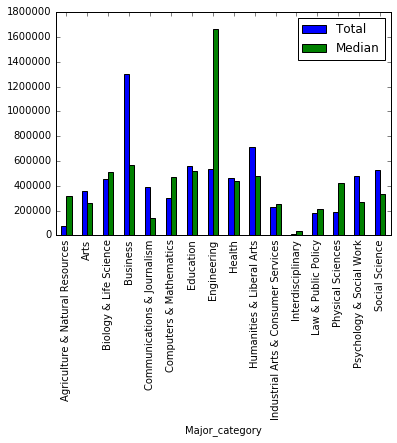

In [73]:
recent_grads.groupby("Major_category")['Total','Median'].sum().plot(kind = "bar")

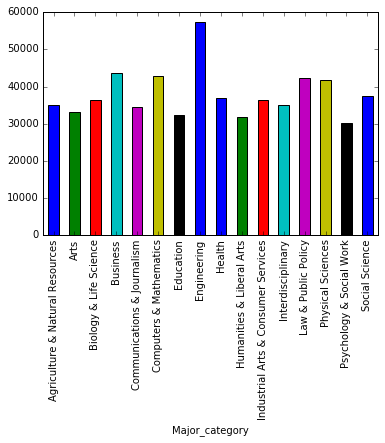

In [74]:
recent_grads.groupby("Major_category")['Median'].mean().plot(kind = "bar")

* From the above graphs even though Engineering receives the highest mean salary. We can conclude that popular majors receives a high salary since popular majors like Bussines, Engineering, Humanities & Liberal Arts, Computer & Mathematics recieves a relatively high salary compared to other majors.

### Box plot

To use a box plot to explore the distribution of median salaries and unemployment rate.

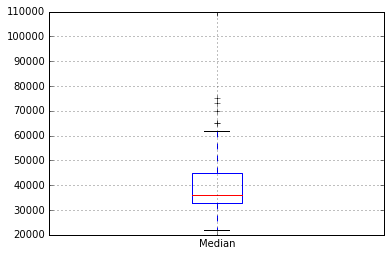

In [75]:
recent_grads[["Median"]].boxplot()

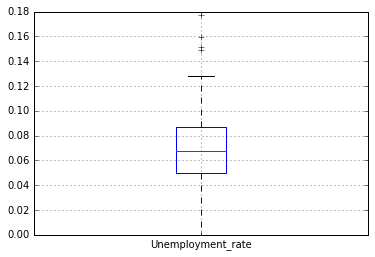

In [76]:
recent_grads[["Unemployment_rate"]].boxplot()

### Hexagonal bin

To use a hexagonal bin plot to visualize the columns that has dense scatter plots from earlier in the project.

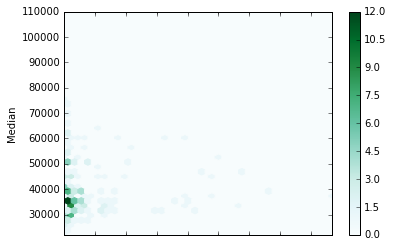

In [77]:
recent_grads.plot.hexbin(x= "Men", y = "Median", gridsize = 40)

### Conclusion

* The median salary is 35,000.
* Education, Health, Phycology and Social Work areas are predominatly female and Engineering, Computers & Mathematcis areas are predominately male.
* From the bar plots Business category has the highest count of students. For the Business category both male and females count is relatively same.